# Assignment 5

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# 1- Test bed
# SGD WITH MOMENT AND ADAM

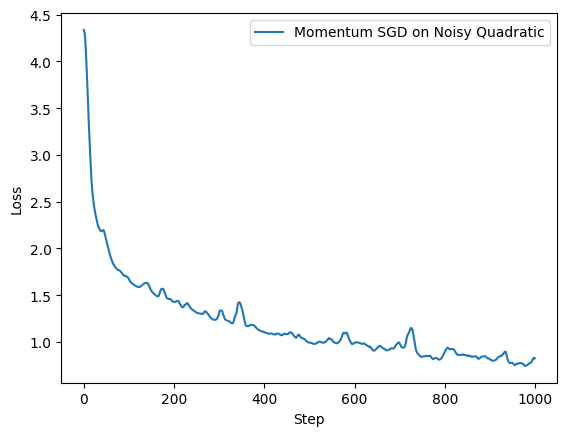

In [2]:


class MomentumSGDNoisyQuadratic:
    def __init__(self, dim, lr, momentum, alpha, beta, c, B):
        self.dim = dim
        self.lr = lr
        self.momentum = momentum
        self.alpha = alpha
        self.beta = beta
        self.c = c
        self.B = B

        self.A = torch.zeros(1)
        self.Am = torch.zeros(1)
        self.C = torch.zeros(1)

        self.hessian = torch.diag(torch.tensor([1 / (i + 1) for i in range(dim)]))
        self.covariance = torch.diag(torch.tensor([1 / (i + 1) for i in range(dim)]))
        self.theta = torch.normal(0, 1, size=(dim,))
        self.momentum_buffer = torch.zeros_like(self.theta)

    def step(self):
        noise = torch.normal(0, 1, size=self.theta.shape) * torch.sqrt(torch.diag(self.covariance))
        gradient = self.hessian @ self.theta + noise
        self.momentum_buffer = self.momentum * self.momentum_buffer + gradient
        self.theta -= self.lr * self.momentum_buffer

        A_theta = self.A * (1 - self.alpha * self.lr) ** 2 + (self.beta * self.lr) ** 2 * self.Am \
                  - 2 * (1 - self.alpha * self.lr) * self.beta * self.lr * self.C + (self.alpha ** 2 * self.c / self.B)
        A_m = (self.alpha * self.lr) ** 2 * self.A + (self.beta * self.lr) ** 2 * self.Am + 2 * self.alpha * self.beta * self.lr * self.C \
              + (self.c / self.B)
        C = (1 - self.alpha * self.lr) * self.alpha * self.lr * self.A + self.beta ** 2 * self.lr * self.Am \
            + (1 - 2 * self.alpha * self.lr) * self.beta * self.lr * self.C + (self.alpha * self.c / self.B)

        self.A = A_theta
        self.Am = A_m
        self.C = C

    def simulate(self, steps):
        losses = []
        for _ in range(steps):
            loss = 0.5 * self.theta @ self.hessian @ self.theta
            losses.append(loss.item())
            self.step()
        return losses

def main():
    dim = 1000  # dimensionality of the problem
    lr = 0.01  # learning rate
    momentum = 0.9  # momentum
    alpha = 1.0  # alpha
    beta = 0.9  # beta
    c = 1.0  # constant c
    B = 128  # batch size
    num_steps = 1000  # number of optimization stepsa

    model = MomentumSGDNoisyQuadratic(dim, lr, momentum, alpha, beta, c, B)
    losses = model.simulate(num_steps)

    plt.plot(losses, label='Momentum SGD on Noisy Quadratic')
    plt.xlabel('Step')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


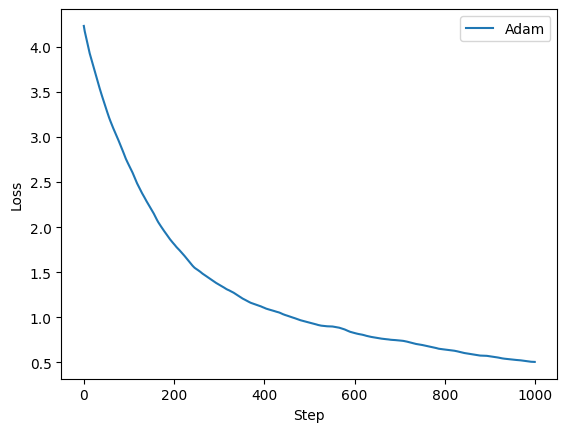

In [3]:
class AdamNoisyQuadratic:
    def __init__(self, dim, lr, beta1, beta2, alpha, beta, c, B, epsilon=1e-8):
        self.dim = dim
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.alpha = alpha
        self.beta = beta
        self.c = c
        self.B = B
        self.epsilon = epsilon

        self.A = torch.zeros(1)
        self.Am = torch.zeros(1)
        self.C = torch.zeros(1)

        self.hessian = torch.diag(torch.tensor([1 / (i + 1) for i in range(dim)]))
        self.covariance = torch.diag(torch.tensor([1 / (i + 1) for i in range(dim)]))
        self.theta = torch.normal(0, 1, size=(dim,))
        self.m = torch.zeros_like(self.theta)
        self.v = torch.zeros_like(self.theta)
        self.t = 0

    def step(self):
        self.t += 1
        noise = torch.normal(0, 1, size=self.theta.shape) * torch.sqrt(torch.diag(self.covariance))
        gradient = self.hessian @ self.theta + noise
        self.m = self.beta1 * self.m + (1 - self.beta1) * gradient
        self.v = self.beta2 * self.v + (1 - self.beta2) * gradient**2
        m_hat = self.m / (1 - self.beta1**self.t)
        v_hat = self.v / (1 - self.beta2**self.t)
        self.theta -= self.lr * m_hat / (torch.sqrt(v_hat) + self.epsilon)

        A_theta = self.A * (1 - self.alpha * self.lr) ** 2 + (self.beta * self.lr) ** 2 * self.Am \
                  - 2 * (1 - self.alpha * self.lr) * self.beta * self.lr * self.C + (self.alpha ** 2 * self.c / self.B)
        A_m = (self.alpha * self.lr) ** 2 * self.A + (self.beta * self.lr) ** 2 * self.Am + 2 * self.alpha * self.beta * self.lr * self.C \
              + (self.c / self.B)
        C = (1 - self.alpha * self.lr) * self.alpha * self.lr * self.A + self.beta ** 2 * self.lr * self.Am \
            + (1 - 2 * self.alpha * self.lr) * self.beta * self.lr * self.C + (self.alpha * self.c / self.B)

        self.A = A_theta
        self.Am = A_m
        self.C = C

    def simulate(self, steps):
        losses = []
        for _ in range(steps):
            loss = 0.5 * self.theta @ self.hessian @ self.theta
            losses.append(loss.item())
            self.step()
        return losses

def main():
    dim = 1000  # dimensionality
    lr_adam = 0.01
    momentum = 0.9
    beta1 = 0.9
    beta2 = 0.999
    alpha = 1.0
    beta = 0.9
    c = 1.0
    B = 128
    num_steps = 1000

    adam_model = AdamNoisyQuadratic(dim, lr_adam, beta1, beta2, alpha, beta, c, B)
    adam_losses = adam_model.simulate(num_steps)

    plt.plot(adam_losses, label='Adam')
    plt.xlabel('Step')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()

# Optimize learning rate schedule


Best learning rate found: 0.03
{0.0005: 2.023700714111328, 0.001: 1.7931504249572754, 0.003: 1.171342372894287, 0.01: 0.8411564826965332, 0.03: 0.670188307762146, 0.1: 1.6860072612762451, 0.3: 4.911433219909668}


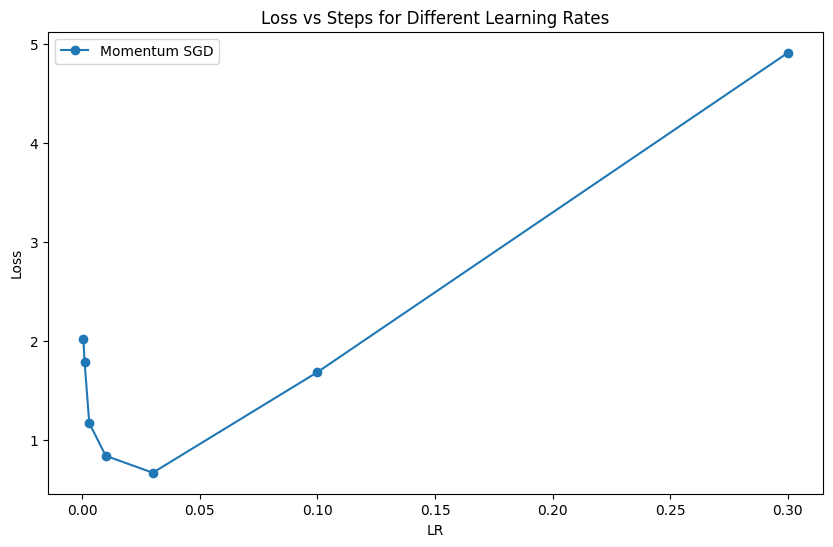

In [4]:
def grid_search(model_class, dim, momentum, alpha, beta, c, B, num_steps, lr_candidates):
    results = {}

    for lr in lr_candidates:
        model = model_class(dim, lr, momentum, alpha, beta, c, B)
        losses = model.simulate(num_steps)
        results[lr] = losses[-1]

    best_lr = min(results, key=results.get)
    return best_lr, results

def main():
    dim = 1000
    momentum = 0.9
    alpha = 1.0
    beta = 0.9
    c = 1.0
    B = 128
    num_steps = 1000
    lr_candidates = [0.0005, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3]

    best_lr, results = grid_search(MomentumSGDNoisyQuadratic, dim, momentum, alpha, beta, c, B, num_steps, lr_candidates)
    print(f"Best learning rate found: {best_lr}")

    plt.figure(figsize=(10, 6))
    print(results)
    plt.plot(list(results.keys()), list(results.values()), marker='o', label='Momentum SGD')

    plt.xlabel('LR')
    plt.ylabel('Loss')
    plt.title('Loss vs Steps for Different Learning Rates')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()

Best learning rate found: 0.03
Best learning rate found: 0.01
{0.0005: 2.354792356491089, 0.001: 1.6011576652526855, 0.003: 1.278983473777771, 0.01: 0.7829434871673584, 0.03: 1.1727344989776611, 0.1: 1.9220601320266724, 0.3: 4.671854019165039}


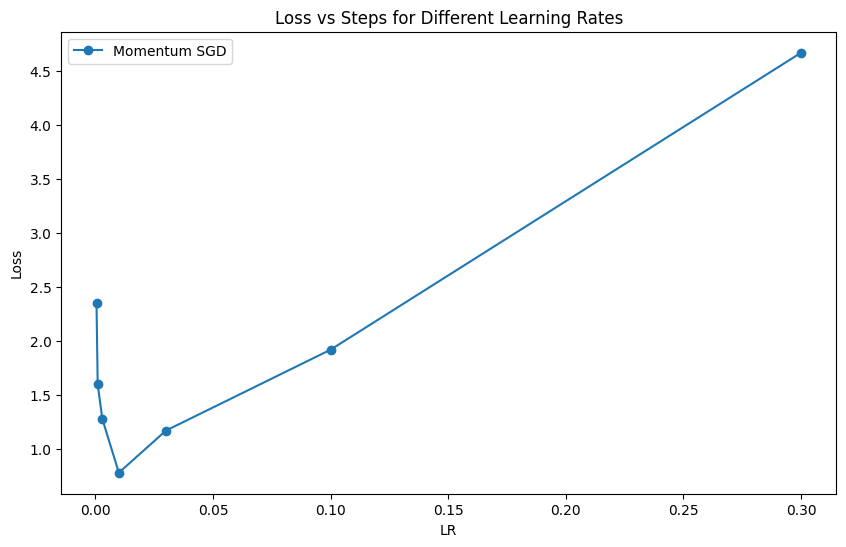

In [5]:
#  grid seearch adam
dim = 1000
lr_adam = 0.01
momentum = 0.9
beta1 = 0.9
beta2 = 0.999
alpha = 1.0
beta = 0.9
c = 1.0
B = 128
num_steps = 1000

# perform grid search, paraleliizing
lr_candidates = [0.0005, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3]
results = {}
for lr in lr_candidates:
    adam_model = AdamNoisyQuadratic(dim, lr, beta1, beta2, alpha, beta, c, B)
    losses = adam_model.simulate(num_steps)

    results[lr] = losses[-1]

# find the best learning rate
best_lr = min(results, key=results.get)
print(f"Best learning rate found: {best_lr}")


if __name__ == "__main__":
    main()


# Using DP gave a negative value for the LR, and  I do not know why:

In [6]:
# import torch
# import matplotlib.pyplot as plt
# import numpy as np
# from scipy.optimize import minimize

# class MomentumSGDNoisyQuadratic:
#     def __init__(self, dim, momentum, alpha, beta, c, B):
#         self.dim = dim
#         self.momentum = momentum
#         self.alpha = alpha
#         self.beta = beta
#         self.c = c
#         self.B = B

#         self.A = torch.zeros(1)
#         self.Am = torch.zeros(1)
#         self.C = torch.zeros(1)

#         self.hessian = torch.diag(torch.tensor([1 / (i + 1) for i in range(dim)]))
#         self.covariance = torch.diag(torch.tensor([1 / (i + 1) for i in range(dim)]))
#         self.theta = torch.normal(0, 1, size=(dim,))
#         self.momentum_buffer = torch.zeros_like(self.theta)

#     def step(self, lr):
#         noise = torch.normal(0, 1, size=self.theta.shape) * torch.sqrt(torch.diag(self.covariance))
#         gradient = self.hessian @ self.theta + noise
#         self.momentum_buffer = self.momentum * self.momentum_buffer + gradient
#         self.theta -= lr * self.momentum_buffer

#         A_theta = self.A * (1 - self.alpha * lr) ** 2 + (self.beta * lr) ** 2 * self.Am \
#                   - 2 * (1 - self.alpha * lr) * self.beta * lr * self.C + (self.alpha ** 2 * self.c / self.B)
#         A_m = (self.alpha * lr) ** 2 * self.A + (self.beta * lr) ** 2 * self.Am + 2 * self.alpha * self.beta * lr * self.C \
#               + (self.c / self.B)
#         C = (1 - self.alpha * lr) * self.alpha * lr * self.A + self.beta ** 2 * lr * self.Am \
#             + (1 - 2 * self.alpha * lr) * self.beta * lr * self.C + (self.alpha * self.c / self.B)

#         self.A = A_theta
#         self.Am = A_m
#         self.C = C

#     def compute_exact_risk(self, lr_schedule):
#         E_theta = torch.zeros(len(lr_schedule) + 1)
#         V_theta = torch.zeros(len(lr_schedule) + 1)

#         # Initial conditions
#         E_theta[0] = torch.mean(self.theta)
#         V_theta[0] = torch.var(self.theta)

#         for t in range(len(lr_schedule)):
#             lr = lr_schedule[t]
#             E_theta[t + 1] = (1 - self.alpha * lr) * E_theta[t]
#             V_theta[t + 1] = (1 - self.alpha * lr ** 2) * V_theta[t] + (self.alpha ** 2 * self.c) / (2 * self.B)

#         return E_theta[-1] + V_theta[-1]  # Total risk as sum of E and V

#     def optimize_learning_rate_schedule_dp(self, max_steps):
#         # Function to optimize: compute risk for a given lr_schedule
#         def objective(lr_schedule):
#             return self.compute_exact_risk(lr_schedule)

#         # Initial guess for lr_schedule
#         initial_guess = np.full(10, 0.01)  # Starting with a constant lr for simplicity

#         # Minimize the risk by finding the optimal lr_schedule
#         result = minimize(objective, initial_guess, method='Nelder-Mead')

#         optimal_lr_schedule = result.x
#         optimal_risk = result.fun

#         return optimal_lr_schedule, optimal_risk

#     def simulate_optimal(self, lr_schedule):
#         # Simulate optimization with the optimal lr_schedule
#         losses = []
#         for lr in lr_schedule:
#             loss = 0.5 * self.theta @ self.hessian @ self.theta
#             losses.append(loss.item())
#             self.step(lr)
#         return losses

# def main():
#     dim = 1000  # dimensionality of the problem
#     momentum = 0.9  # momentum
#     alpha = 1.0  # alpha
#     beta = 0.9  # beta
#     c = 1.0  # constant c
#     B = 128  # batch size
#     num_steps = 50  # number of optimization steps

#     model = MomentumSGDNoisyQuadratic(dim, momentum, alpha, beta, c, B)

#     # Optimize learning rate schedule using dynamic programming
#     optimal_lr_schedule, optimal_risk = model.optimize_learning_rate_schedule_dp(num_steps)
#     print(f"Optimal learning rate schedule: {optimal_lr_schedule}")
#     print(f"Optimal risk: {optimal_risk}")
#     # Simulate with the optimal lr_schedule
#     losses = model.simulate_optimal(optimal_lr_schedule)

#     plt.plot(losses, label='Momentum SGD on Noisy Quadratic')
#     plt.xlabel('Step')
#     plt.ylabel('Loss')
#     plt.legend()
#     plt.show()

# if __name__ == "__main__":
#     main()


# Check the *scaling*

Check that at very small batch sizes, the optimal learning rate scales with batch size as expected: proportional to the batch size for SGD, proportional to the square root of the batch size for Adam.


In [7]:

small_batch_sizes = [1, 2, 4, 8, 16, 32, 64]
# compute the optimal lr
# create sosme lrs to perform the grid search, usisng a linspace (with 10 values between 0.0001 and 0.1)
lrs = np.linspace(0.0001, 0.1, 10)
optimal_lrs = []
def compute_optimal_lr_sgd(B):
    results = {}
    for lr in lrs:
        model = MomentumSGDNoisyQuadratic(dim, lr, momentum, alpha, beta, c, B)
        losses = model.simulate(num_steps)
        results[lr] = losses[-1]
    best_lr = min(results, key=results.get)
    return best_lr

def compute_optimal_lr_adam(B):
    results = {}
    for lr in lrs:
        model = AdamNoisyQuadratic(dim, lr_adam, beta1, beta2, alpha, beta, c, B)
        losses = model.simulate(num_steps)
        results[lr] = losses[-1]
    best_lr = min(results, key=results.get)
    return best_lr


In [8]:
dim = 1000  # dimensionality of the problem
lr = 0.01  # learning rate
momentum = 0.9  # momentum
alpha = 1.0  # alpha
beta = 0.9  # beta
c = 1.0  # constant c
B = 128  # batch size
num_steps = 1000  # number of optimization stepsa

model = MomentumSGDNoisyQuadratic(dim, lr, momentum, alpha, beta, c, B)
for B in small_batch_sizes:
    optimal_lr_sgd = compute_optimal_lr_sgd(B)
    optimal_lr_adam = compute_optimal_lr_adam(B)
    optimal_lrs.append((optimal_lr_sgd, optimal_lr_adam))



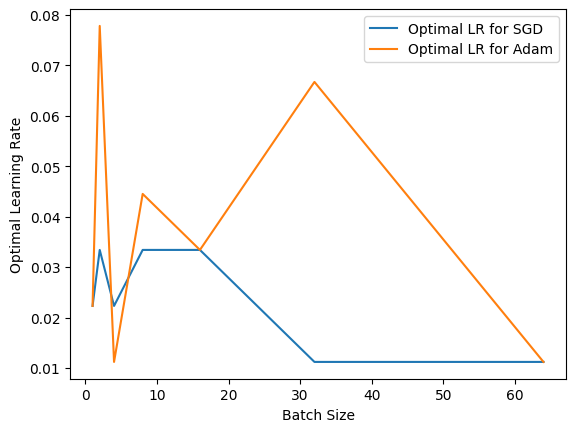

In [9]:

optimal_lrs = np.array(optimal_lrs)
plt.plot(small_batch_sizes, optimal_lrs[:, 0], label='Optimal LR for SGD')
plt.plot(small_batch_sizes, optimal_lrs[:, 1], label='Optimal LR for Adam')
plt.xlabel('Batch Size')
plt.ylabel('Optimal Learning Rate')
plt.legend()
plt.show()


# Batch size vs num steps

Batch size: 2, Number of steps to reach target loss: 20478
Batch size: 4, Number of steps to reach target loss: 14616
Batch size: 8, Number of steps to reach target loss: 20689
Batch size: 16, Number of steps to reach target loss: 20279
Batch size: 32, Number of steps to reach target loss: 13867
Batch size: 64, Number of steps to reach target loss: 16706


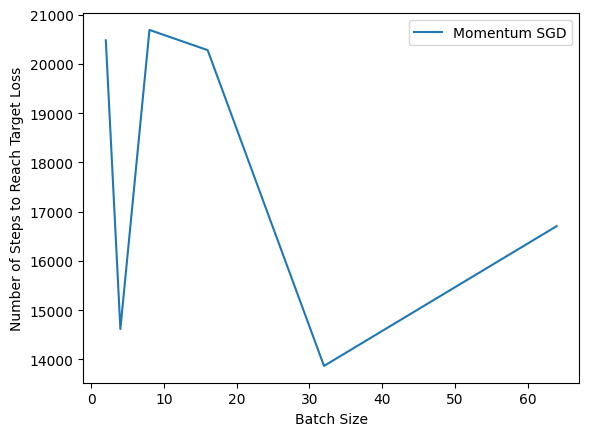

In [26]:
# Look at the relationship between the batch size and the number of steps to reach a target loss. Study the effects of momentum and using Adam on this relationship.
target_loss = 0.12


small_batch_sizes = [2, 4, 8, 16, 32, 64]

def get_number_steps_target_loss(target_loss):
    list_steps_per_batch = []
    for batch_size in small_batch_sizes:
        model = MomentumSGDNoisyQuadratic(dim, lr, momentum, alpha, beta, c, batch_size)
        # do a step and check if the loss is below the target
        loss = 0.5 * model.theta @ model.hessian @ model.theta
        steps = 0
        while loss > target_loss:
            model.step()
            loss = 0.5 * model.theta @ model.hessian @ model.theta
            # print(loss)
            steps += 1

        print(f"Batch size: {batch_size}, Number of steps to reach target loss: {steps}")
        list_steps_per_batch.append(steps)

    return list_steps_per_batch

steps_per_batch = get_number_steps_target_loss(target_loss)
plt.plot(small_batch_sizes, steps_per_batch, label='Momentum SGD')
plt.xlabel('Batch Size')
plt.ylabel('Number of Steps to Reach Target Loss')
plt.legend()
plt.show()


# Adam

In [ ]:
# # Look at the relationship between the batch size and the number of steps to reach a target loss. Study the effects of momentum and using Adam on this relationship.
# target_loss = 0.01


# small_batch_sizes = [2, 4, 8, 16, 32, 64]

# def get_number_steps_target_loss(target_loss):
#     list_steps_per_batch = []
#     for batch_size in small_batch_sizes:
#         model = AdamNoisyQuadratic(dim, lr, momentum, alpha, beta, c, batch_size, batch_size)
#         # do a step and check if the loss is below the target
#         # loss = 0.5 * model.theta @ model.hessian @ model.theta
#         steps = 0
#         while True:
#             model.step()
#             print(model.theta)
#             # print(model.hessian) # hessian is nana
#             loss = 0.5 * model.theta @ model.hessian @ model.theta
#             print(loss)
#             # print(loss)
#             steps += 1
#             if loss < target_loss:
#                 break

#         print(f"Batch size: {batch_size}, Number of steps to reach target loss: {steps}")
#         list_steps_per_batch.append(steps)

#     return list_steps_per_batch

# steps_per_batch = get_number_steps_target_loss(target_loss)
# plt.plot(small_batch_sizes, steps_per_batch, label='Adam')
# plt.xlabel('Batch Size')
# plt.ylabel('Number of Steps to Reach Target Loss')
# plt.legend()
# plt.show()
